In [131]:
import pandas as pd
df_original = pd.read_csv("../src/taxipred/data/cleaned_data.csv", index_col=0)
df_original.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [132]:
df_original.info()


<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       923 non-null    float64
 1   Time_of_Day            876 non-null    object 
 2   Day_of_Week            878 non-null    object 
 3   Passenger_Count        923 non-null    float64
 4   Traffic_Conditions     874 non-null    object 
 5   Weather                878 non-null    object 
 6   Base_Fare              923 non-null    float64
 7   Per_Km_Rate            923 non-null    float64
 8   Per_Minute_Rate        923 non-null    float64
 9   Trip_Duration_Minutes  923 non-null    float64
 10  Trip_Price             923 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.5+ KB


In [133]:
df_filled = df_original.copy()
df_filled["Time_of_Day"] = df_filled["Time_of_Day"].fillna("Afternoon")
df_filled["Day_of_Week"] = df_filled["Day_of_Week"].fillna("Weekday")
df_filled["Traffic_Conditions"] = df_filled["Traffic_Conditions"].fillna("Low") #stor öking, 363 mot 412!  
df_filled["Weather"] = df_filled["Weather"].fillna("Clear")


df_filled["Day_of_Week"].value_counts()


Day_of_Week
Weekday    645
Weekend    278
Name: count, dtype: int64

In [134]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       923 non-null    float64
 1   Time_of_Day            923 non-null    object 
 2   Day_of_Week            923 non-null    object 
 3   Passenger_Count        923 non-null    float64
 4   Traffic_Conditions     923 non-null    object 
 5   Weather                923 non-null    object 
 6   Base_Fare              923 non-null    float64
 7   Per_Km_Rate            923 non-null    float64
 8   Per_Minute_Rate        923 non-null    float64
 9   Trip_Duration_Minutes  923 non-null    float64
 10  Trip_Price             923 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.5+ KB


### Is the data normally distributed? 

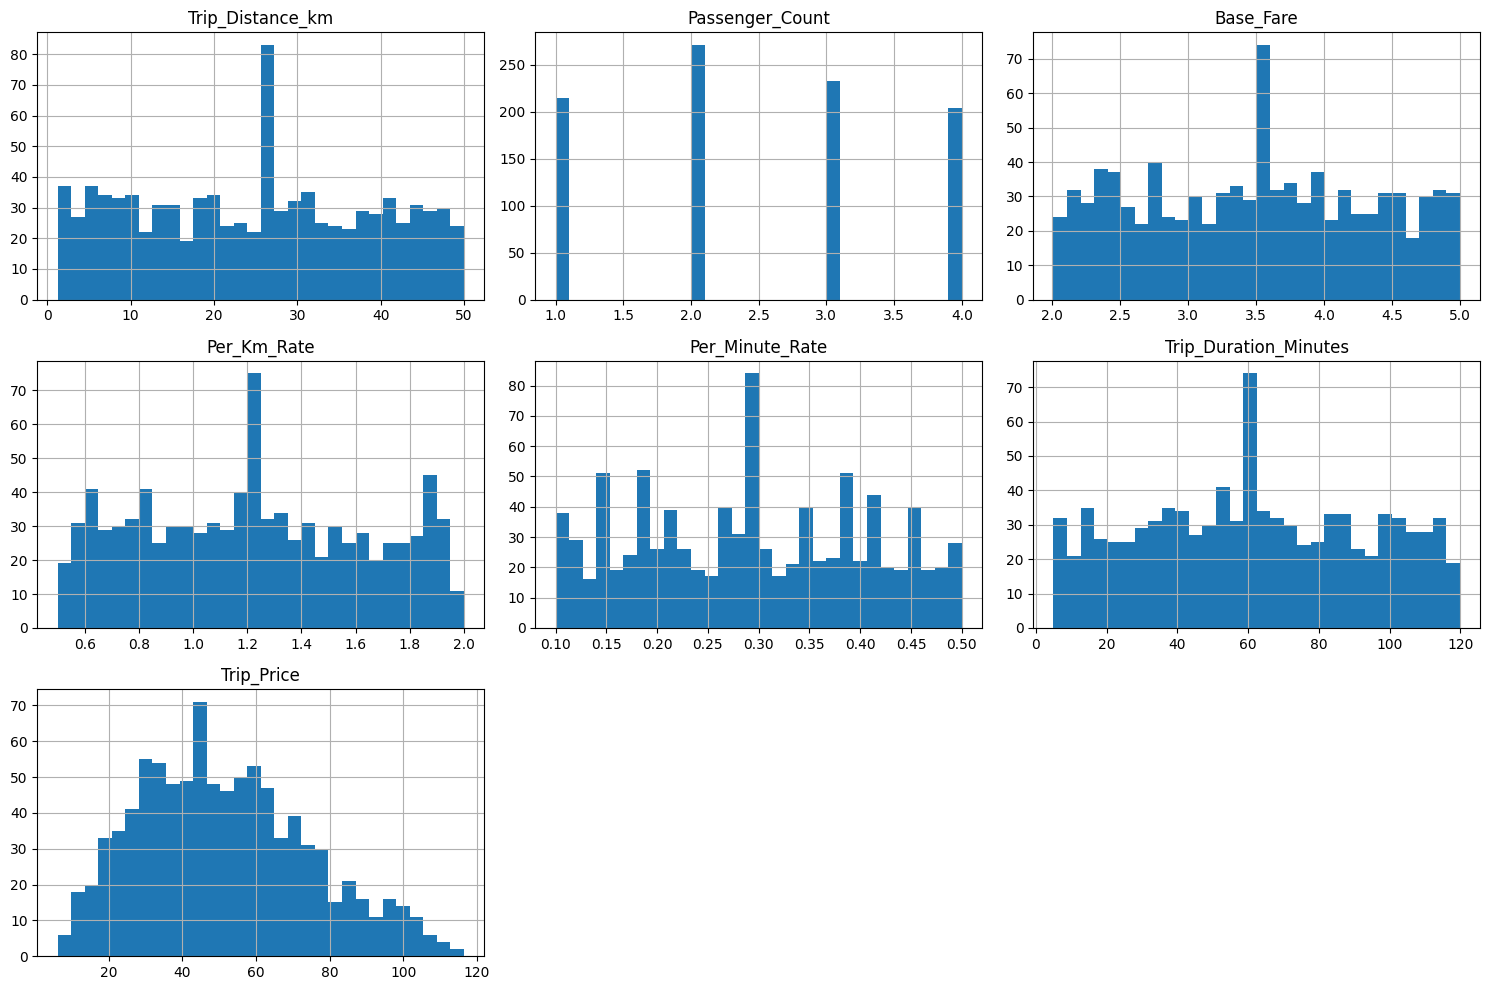

In [135]:
import matplotlib.pyplot as plt

df_filled.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

## Encoding

In [136]:
df_encoded = pd.get_dummies(df_filled, drop_first=True)
df_encoded.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,False,True,False,False,True,False,False,False
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,True,False,False,True,False,False,False,False
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,True,False,False,False,True,False,False,False
4,25.83,3.0,2.93,0.63,0.32,22.64,15.6180,True,False,False,False,False,False,False,False
5,8.64,2.0,2.55,1.71,0.48,89.33,60.2028,False,False,False,True,False,True,False,False


#### Train|test|val split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

X, y = df_encoded.drop(columns="Trip_Price"), df_encoded["Trip_Price"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42) #X_train_full använder du när du utvärderar alla modeller
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.11, random_state=42)
X_train_full.shape, X_train.shape, X_test.shape, X_val.shape, y_train_full.shape, y_train.shape, y_test.shape, y_val.shape


((830, 14), (93, 14), (92, 14), (830,), (93,), (92,))

## Scale data

In [138]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_val = scaler.transform(X_val)
scaled_X_train.shape, scaled_X_test.shape, scaled_X_val.shape



((738, 14), (93, 14), (92, 14))

In [139]:
print(f"{scaled_X_train.max()=:.3f}")
print(f"{scaled_X_train.min()=:.3f}")
print(f"{scaled_X_train.std()=:.3f}\n")
print(f"{scaled_X_test.max()=:.3f}")
print(f"{scaled_X_test.min()=:.3f}")
print(f"{scaled_X_test.std()=:.3f}\n")
print(f"{scaled_X_val.max()=:.3f}")
print(f"{scaled_X_val.min()=:.3f}")
print(f"{scaled_X_val.std()=:.3f}")

scaled_X_train.max()=4.071
scaled_X_train.min()=-1.778
scaled_X_train.std()=1.000

scaled_X_test.max()=4.071
scaled_X_test.min()=-1.732
scaled_X_test.std()=1.018

scaled_X_val.max()=4.071
scaled_X_val.min()=-1.777
scaled_X_val.std()=0.987


## Find K for KNeighborsRegressor

In [140]:
# from sklearn.metrics import accuracy_score

errors = []
for i in range(1,50): 
    model_find_k = KNeighborsRegressor(n_neighbors=i)
    model_find_k.fit(scaled_X_train, y_train)
    y_pred = model_find_k.predict(scaled_X_val)
    error = root_mean_squared_error(y_val, y_pred)
    errors.append(error)
errors[:10]

[16.191501160539104,
 14.551954436796379,
 14.238980550686843,
 13.755312337257045,
 13.751751649622358,
 13.852065940738914,
 13.4677758118108,
 13.395047346267194,
 13.138130964155913,
 13.322361428933897]

<Axes: >

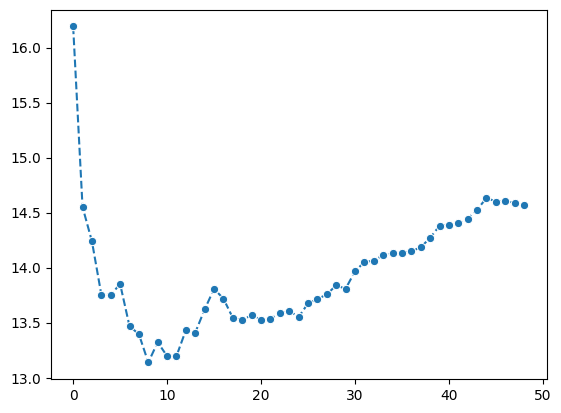

In [141]:
import seaborn as sns
sns.lineplot(errors, marker="o",linestyle="--")

In [142]:
best_index = min(errors)
best_k = errors.index(best_index) +1
print("Best value for k: ", best_k)

Best value for k:  9


In [143]:
models = {
"LinearRegression": LinearRegression(),
"RidgeCV": RidgeCV(),
"ElasticNetCV": ElasticNetCV(),
"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=best_k),
"RandomForestRegressor": RandomForestRegressor(),
"XGBRegressor": XGBRegressor()
}
scaler = StandardScaler()
scaler.fit(X_train_full)
scaled_X_train = scaler.transform(X_train_full)
result = []
for key, model in models.items(): 
    model.fit(scaled_X_train, y_train_full)
    y_pred = model.predict(scaled_X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    # diff = y_pred[0] - y_test.iloc[0] #räkna ut diff på första[0]
    
    result.append([key, mae, mse, rmse])#, y_pred[0], y_test.iloc[0], diff])
    
df_metric = pd.DataFrame(result, columns=["model", "mae", "mse", "rmse"])
df_metric.sort_values(by="rmse")


,model,mae,mse,rmse
5,XGBRegressor,1.481023,5.854454,2.419598
4,RandomForestRegressor,2.183940,9.208321,3.034522
2,ElasticNetCV,6.699805,70.010661,8.367237
1,RidgeCV,6.692876,70.180358,8.377372
0,LinearRegression,6.693271,70.211837,8.379250
3,KNeighborsRegressor,9.813381,138.026483,11.748467


## Chosen model: XGBOOST